# Exercise 4.10

In [1]:
%matplotlib inline

In [17]:
from __future__ import division, print_function, unicode_literals
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns #visualization library
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression #problem will be solved with scikit
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #linear discriminant analysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis #quadratic discriminant analysis

import statsmodels.api as sm #to compute p-values
from patsy import dmatrices
from sklearn.model_selection import train_test_split


In [66]:
df=pd.read_csv('../../data/Weekly.csv')

In [67]:
df['Direction']=df['Direction'].map({'Up':1,'Down':0})

In [68]:
feature_cols=['Lag1','Lag2','Lag3','Lag4','Lag5','Volume']
df[feature_cols].describe()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618
std,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636
min,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465
25%,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022
50%,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680
75%,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727
max,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214


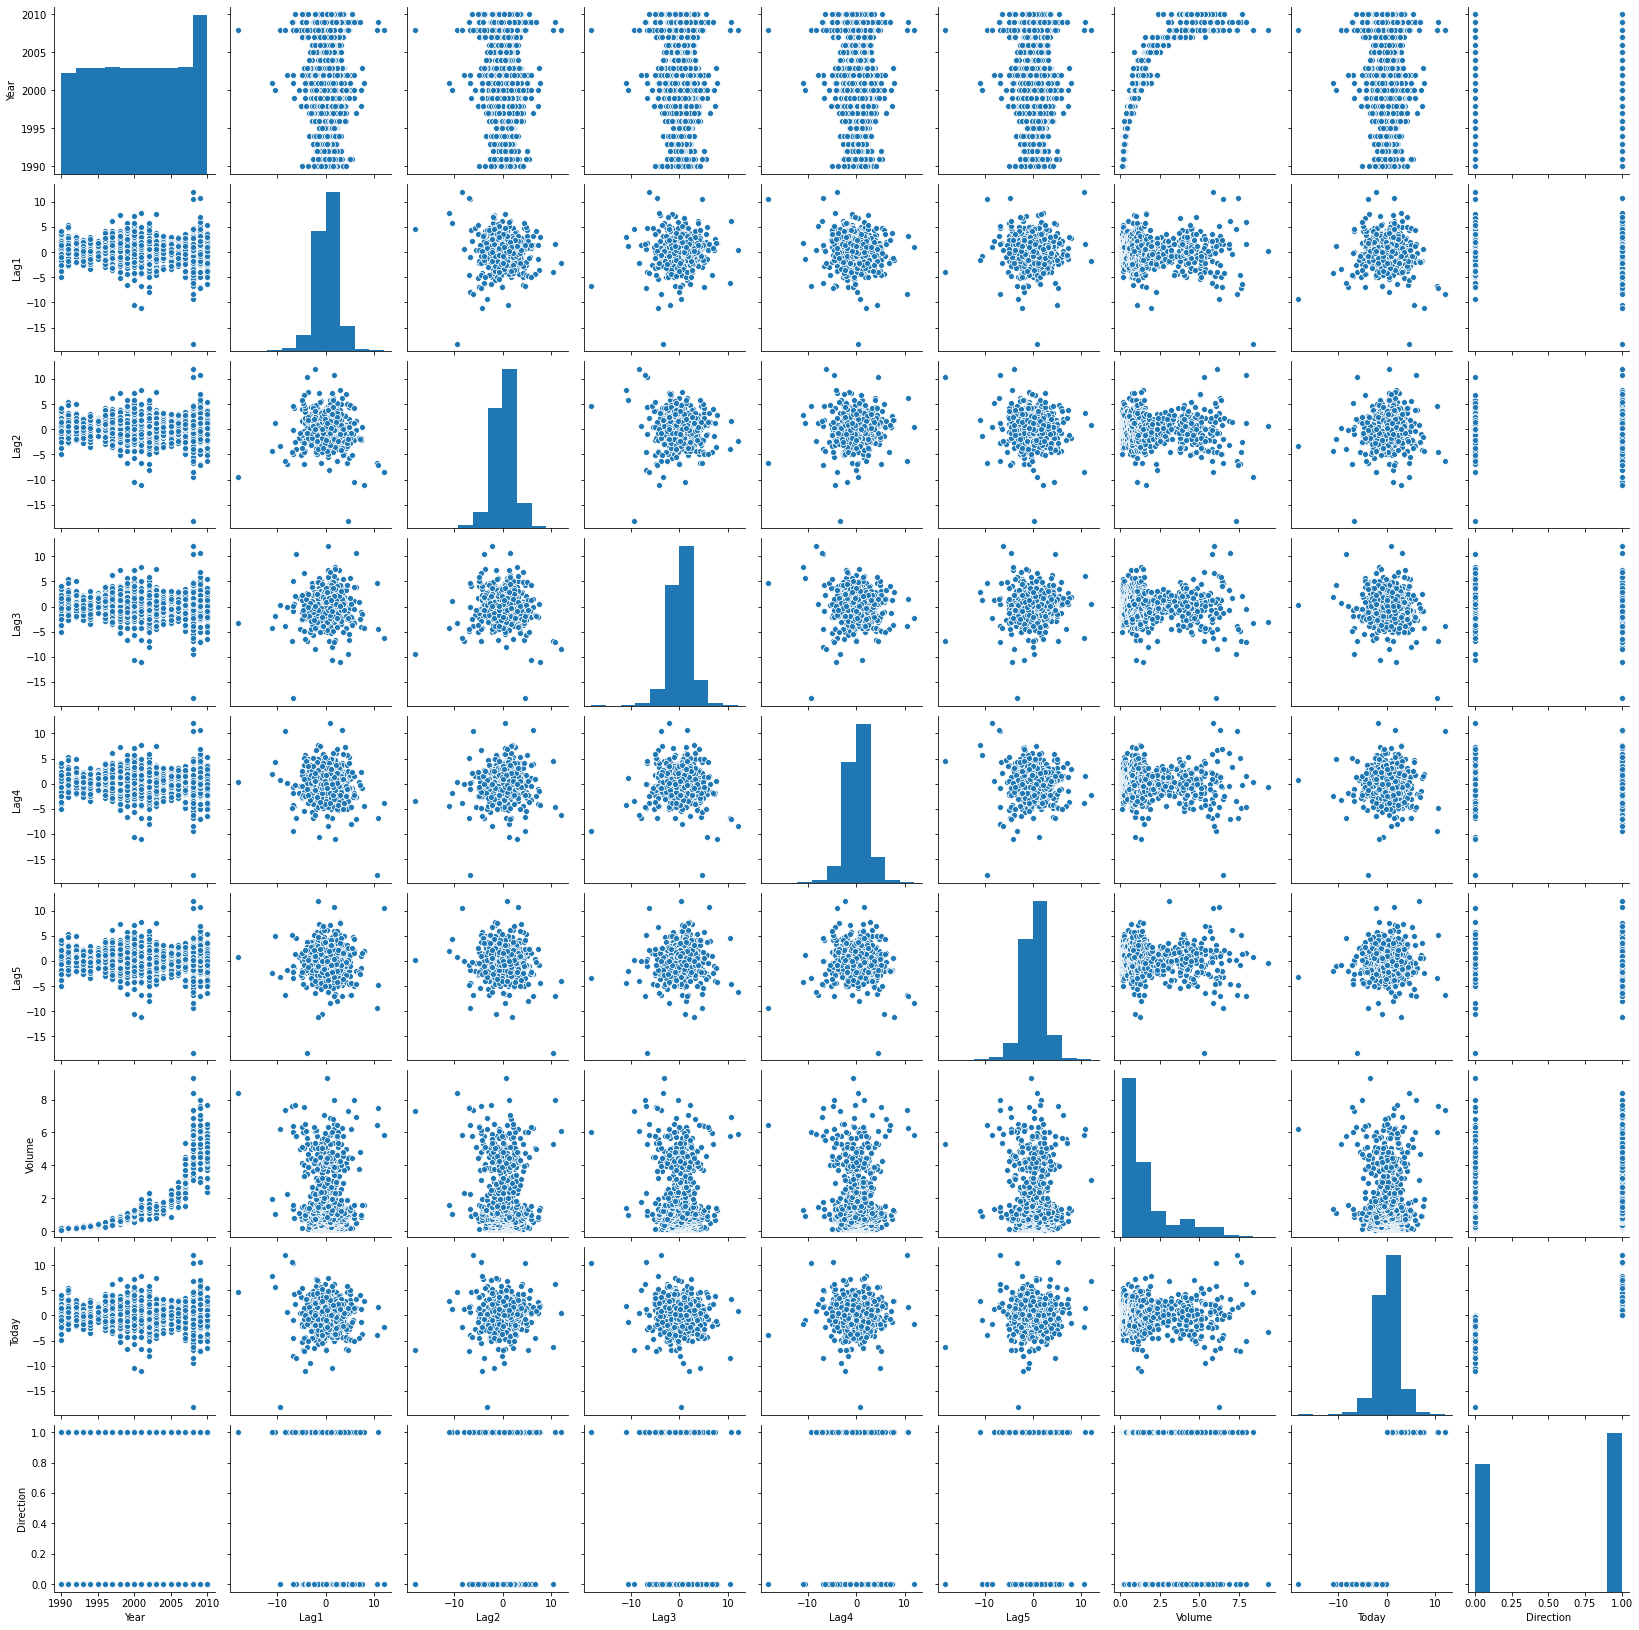

In [69]:
sns.pairplot(df)

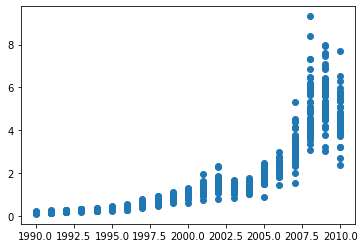

In [70]:
plt.scatter(df['Year'],df['Volume'])

In [71]:
def train_test_spliting(df):
    train_set,test_set=train_test_split(df,test_size=0.2,random_state=42)
    return train_set,test_set
X=df[feature_cols]
y=df['Direction']
X_train,X_test=train_test_spliting(X)
y_train,y_test=train_test_spliting(y)

In [72]:
# Without Scalers
log_reg=LogisticRegression()
mod = log_reg.fit(X_train,y_train)

In [73]:
mod.coef_ #independent var. coefficients

array([[-0.04366577,  0.07387058, -0.0197871 , -0.03488272, -0.0168549 ,
        -0.0154143 ]])

In [74]:
y_pred=mod.predict(X_test)
print('Confusion matrix')
matrix=confusion_matrix(y_test,y_pred)
print(matrix)
print('Classification Report')
report=classification_report(y_test,y_pred)
print(report)
print('Accuracy Score')
score=accuracy_score(y_test,y_pred)
print(score)

Confusion matrix
[[ 17  67]
 [ 28 106]]
Classification Report
              precision    recall  f1-score   support

           0       0.38      0.20      0.26        84
           1       0.61      0.79      0.69       134

    accuracy                           0.56       218
   macro avg       0.50      0.50      0.48       218
weighted avg       0.52      0.56      0.53       218

Accuracy Score
0.5642201834862385


In [75]:
y, X = dmatrices('Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume', data=df, return_type='dataframe')
#logit = sm.Logit(y.ix[:,0], X) #
logit = sm.Logit(y, X) 
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Tue, 08 Sep 2020   Pseudo R-squ.:                0.006580
Time:                        22:05:42   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.

In [76]:
#confusion matrix
y_pred=mod.predict(X[feature_cols])
print('Confusion matrix')
matrix=confusion_matrix(df['Direction'],y_pred)
print(matrix)

# conf_mat = confusion_matrix(df['Direction'], mod.predict(X[feature_cols]))
# print(conf_mat) #alternative to 'fancy' plot

Confusion matrix
[[112 372]
 [113 492]]


In [58]:
df.shape

(1089, 9)

In [94]:
df_9008=df[(df['Year'] >=1990) & (df['Year'] <=2008)]
df_0910=df[(df['Year'] >=2009) & (df['Year'] <=2010)]

In [95]:
X_train=df_9008['Lag2'].to_frame()
X_test=df_0910['Lag2'].to_frame()

In [96]:
y_train=df_9008['Direction'].to_frame()
y_test=df_0910['Direction'].to_frame()

In [97]:
# Logistic Regression
log_reg=LogisticRegression()
mod = log_reg.fit(X_train,y_train)
y_pred=mod.predict(X_test)
print('Confusion matrix')
matrix=confusion_matrix(y_test,y_pred)
print(matrix)
print('Classification Report')
report=classification_report(y_test,y_pred)
print(report)
print('Accuracy Score')
score=accuracy_score(y_test,y_pred)
print(score)

Confusion matrix
[[ 9 34]
 [ 5 56]]
Classification Report
              precision    recall  f1-score   support

           0       0.64      0.21      0.32        43
           1       0.62      0.92      0.74        61

    accuracy                           0.62       104
   macro avg       0.63      0.56      0.53       104
weighted avg       0.63      0.62      0.57       104

Accuracy Score
0.625


/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [98]:
# LDA
lda=LinearDiscriminantAnalysis()
mod = lda.fit(X_train,y_train)
y_pred=mod.predict(X_test)
print('Confusion matrix')
matrix=confusion_matrix(y_test,y_pred)
print(matrix)
print('Classification Report')
report=classification_report(y_test,y_pred)
print(report)
print('Accuracy Score')
score=accuracy_score(y_test,y_pred)
print(score)

Confusion matrix
[[ 9 34]
 [ 5 56]]
Classification Report
              precision    recall  f1-score   support

           0       0.64      0.21      0.32        43
           1       0.62      0.92      0.74        61

    accuracy                           0.62       104
   macro avg       0.63      0.56      0.53       104
weighted avg       0.63      0.62      0.57       104

Accuracy Score
0.625


/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [103]:
# QDA
qda=QuadraticDiscriminantAnalysis()
mod = qda.fit(X_train,y_train)
y_pred=mod.predict(X_test)
print('Confusion matrix')
matrix=confusion_matrix(y_test,y_pred)
print(matrix)
print('Classification Report')
report=classification_report(y_test,y_pred)
print(report)
print('Accuracy Score')
score=accuracy_score(y_test,y_pred)
print(score)

Confusion matrix
[[ 0 43]
 [ 0 61]]
Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.59      1.00      0.74        61

    accuracy                           0.59       104
   macro avg       0.29      0.50      0.37       104
weighted avg       0.34      0.59      0.43       104

Accuracy Score
0.5865384615384616


/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/mode

/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/mode

/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/mode

/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/mode

/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/mode

/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/mode

<Figure size 432x288 with 0 Axes>

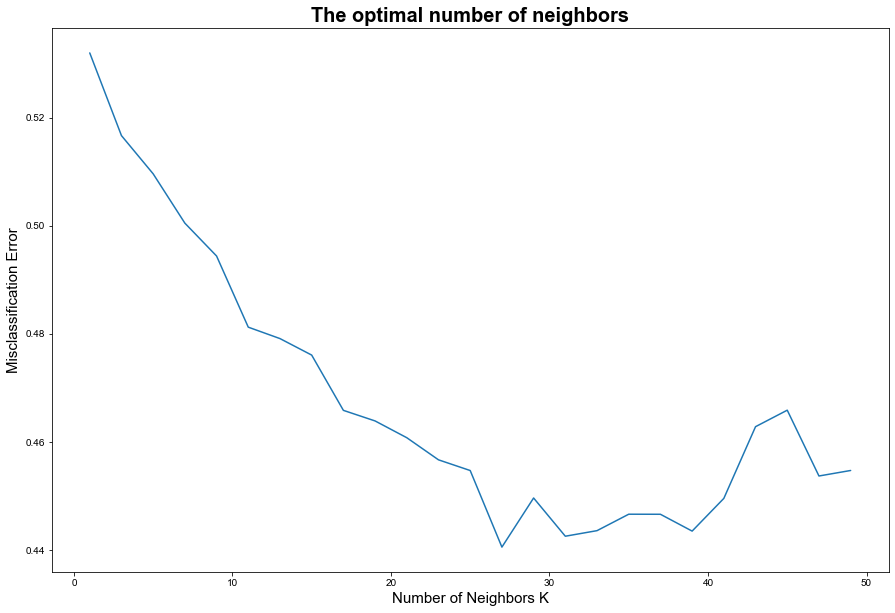

In [100]:
# https://www.kaggle.com/skalskip/iris-data-visualization-and-knn-classification
#  Using cross-validation for parameter turning
from sklearn.model_selection import cross_val_score

k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

import seaborn as sns

MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [99]:
# Knn Classifier
neighbors=1
model=KNeighborsClassifier(n_neighbors=neighbors,n_jobs=1)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('Confusion matrix')
matrix=confusion_matrix(y_test,y_pred)
print(matrix)
print('Classification Report')
report=classification_report(y_test,y_pred)
print(report)
print('Accuracy Score')
score=accuracy_score(y_test,y_pred)
print(score)

Confusion matrix
[[21 22]
 [31 30]]
Classification Report
              precision    recall  f1-score   support

           0       0.40      0.49      0.44        43
           1       0.58      0.49      0.53        61

    accuracy                           0.49       104
   macro avg       0.49      0.49      0.49       104
weighted avg       0.51      0.49      0.49       104

Accuracy Score
0.49038461538461536


/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


In [101]:
# finding best k

best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 27.


In [102]:
# Using best k
neighbors=best_k
model=KNeighborsClassifier(n_neighbors=neighbors,n_jobs=1)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('Confusion matrix')
matrix=confusion_matrix(y_test,y_pred)
print(matrix)
print('Classification Report')
report=classification_report(y_test,y_pred)
print(report)
print('Accuracy Score')
score=accuracy_score(y_test,y_pred)
print(score)

Confusion matrix
[[18 25]
 [24 37]]
Classification Report
              precision    recall  f1-score   support

           0       0.43      0.42      0.42        43
           1       0.60      0.61      0.60        61

    accuracy                           0.53       104
   macro avg       0.51      0.51      0.51       104
weighted avg       0.53      0.53      0.53       104

Accuracy Score
0.5288461538461539


/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


# Exercise 4.11

In [3]:
auto_df=pd.read_csv('../../data/Auto.csv')
auto_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [10]:
mpg_median=auto_df['mpg'].median()
auto_df['mpg01']=auto_df['mpg'].apply(lambda x: 1 if x>mpg_median else 0)

In [11]:
auto_df['mpg01'].value_counts()

0    206
1    191
Name: mpg01, dtype: int64

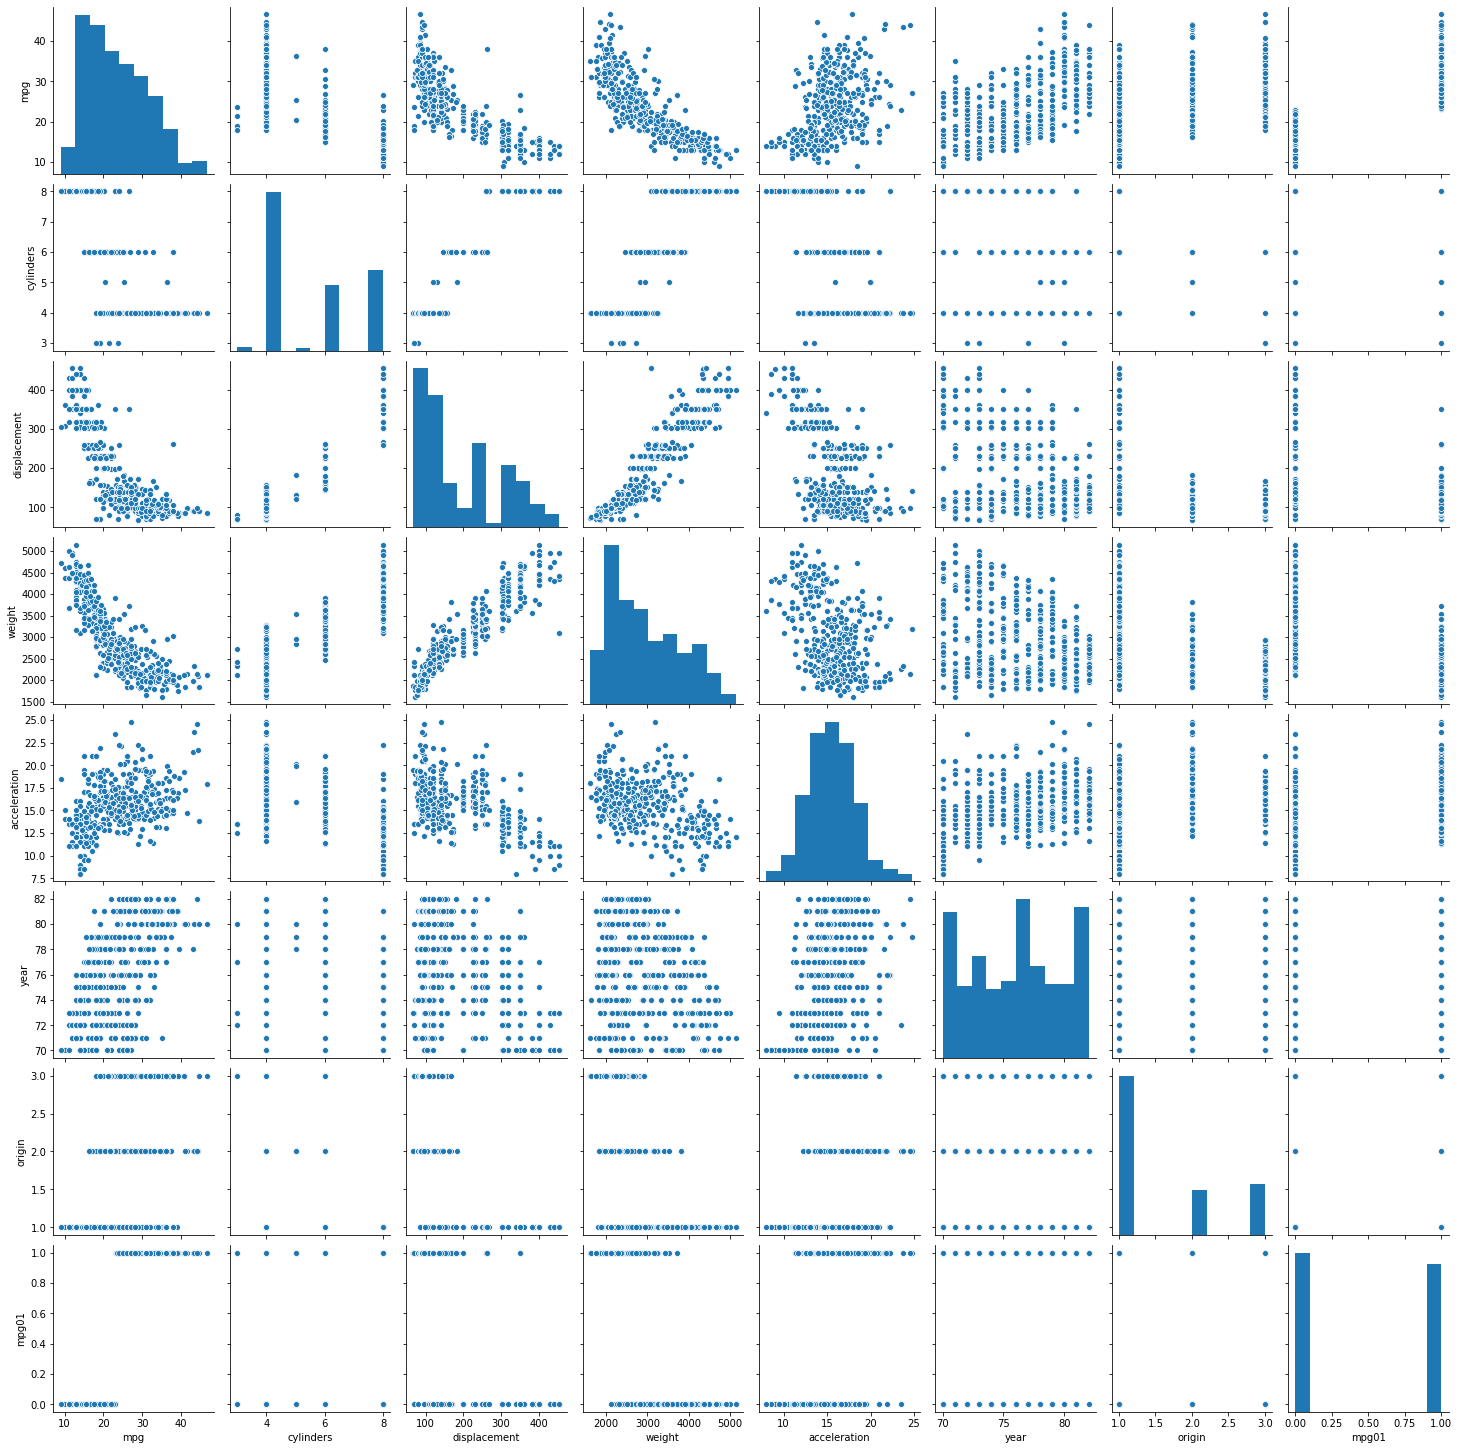

In [12]:
sns.pairplot(auto_df)

In [13]:
# Box plot for sns

/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/seaborn/axisgrid.py:1259: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


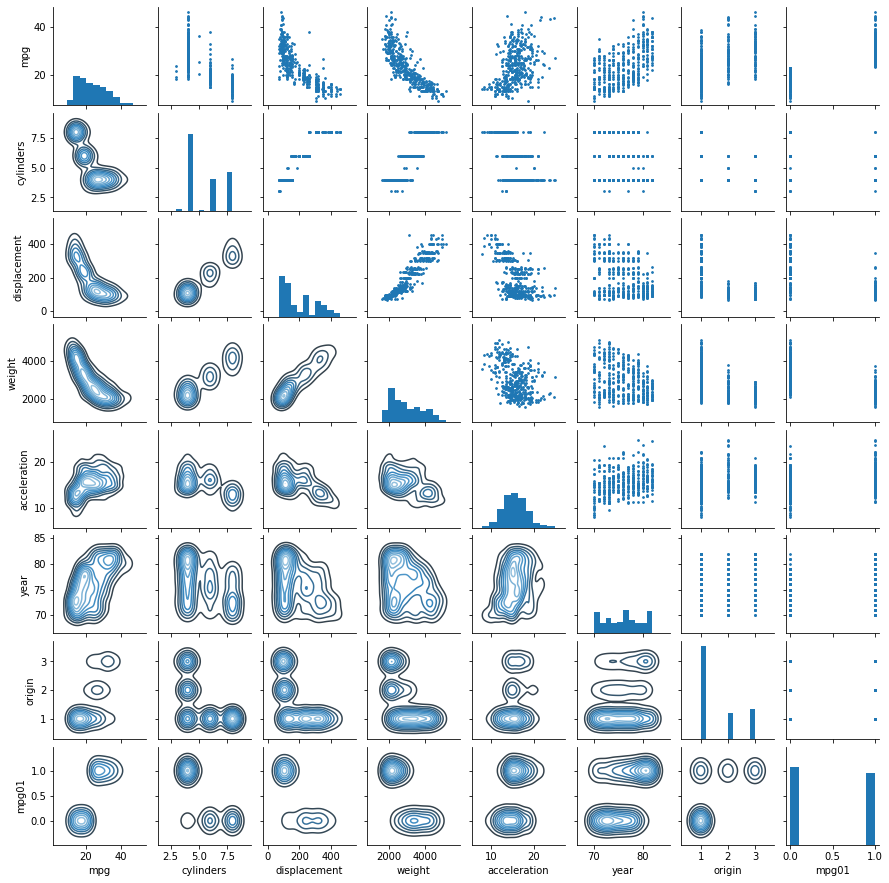

In [15]:
g = sns.PairGrid(auto_df, size=2)
g.map_upper(plt.scatter, s=3)
g.map_diag(plt.hist)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.fig.set_size_inches(12, 12)

In [16]:
auto_df.corr()

,mpg,cylinders,displacement,weight,acceleration,year,origin,mpg01
mpg,1.000000,-0.776260,-0.804443,-0.831739,0.422297,0.581469,0.563698,0.838239
cylinders,-0.776260,1.000000,0.950920,0.897017,-0.504061,-0.346717,-0.564972,-0.740327
displacement,-0.804443,0.950920,1.000000,0.933104,-0.544162,-0.369804,-0.610664,-0.738607
weight,-0.831739,0.897017,0.933104,1.000000,-0.419502,-0.307900,-0.581265,-0.745734
acceleration,0.422297,-0.504061,-0.544162,-0.419502,1.000000,0.282901,0.210084,0.322629
year,0.581469,-0.346717,-0.369804,-0.307900,0.282901,1.000000,0.184314,0.454108
origin,0.563698,-0.564972,-0.610664,-0.581265,0.210084,0.184314,1.000000,0.511393
mpg01,0.838239,-0.740327,-0.738607,-0.745734,0.322629,0.454108,0.511393,1.000000


In [77]:
feature_cols=['cylinders','displacement','weight']
X=auto_df[feature_cols]
y=auto_df['mpg01']
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(297, 3)
(297,)
(100, 3)
(100,)


In [78]:
y_train=y_train.to_frame()
y_test=y_test.to_frame()

In [79]:
print(y_train.shape)
print(y_test.shape)

(297, 1)
(100, 1)


In [32]:
x = auto_df[['cylinders', 'displacement', 'weight']].values
y = auto_df['mpg01'].values
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)


In [80]:
# LDA
lda=LinearDiscriminantAnalysis()
mod = lda.fit(X_train,y_train)
y_pred=mod.predict(X_test)
print('Confusion matrix')
matrix=confusion_matrix(y_test,y_pred)
print(matrix)
print('Classification Report')
report=classification_report(y_test,y_pred)
print(report)
print('Accuracy Score')
score=accuracy_score(y_test,y_pred)
print(score)

Confusion matrix
[[44  8]
 [ 3 45]]
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.85      0.89        52
           1       0.85      0.94      0.89        48

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100

Accuracy Score
0.89


/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [81]:
# QDA
qda=QuadraticDiscriminantAnalysis()
mod = qda.fit(X_train,y_train)
y_pred=mod.predict(X_test)
print('Confusion matrix')
matrix=confusion_matrix(y_test,y_pred)
print(matrix)
print('Classification Report')
report=classification_report(y_test,y_pred)
print(report)
print('Accuracy Score')
score=accuracy_score(y_test,y_pred)
print(score)

Confusion matrix
[[47  5]
 [ 7 41]]
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.90      0.89        52
           1       0.89      0.85      0.87        48

    accuracy                           0.88       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.88      0.88      0.88       100

Accuracy Score
0.88


/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [82]:
# Without Scalers
log_reg=LogisticRegression()
mod = log_reg.fit(X_train,y_train)
y_pred=mod.predict(X_test)
print('Confusion matrix')
matrix=confusion_matrix(y_test,y_pred)
print(matrix)
print('Classification Report')
report=classification_report(y_test,y_pred)
print(report)
print('Accuracy Score')
score=accuracy_score(y_test,y_pred)
print(score)

Confusion matrix
[[45  7]
 [ 6 42]]
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.87      0.87        52
           1       0.86      0.88      0.87        48

    accuracy                           0.87       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.87      0.87      0.87       100

Accuracy Score
0.87


/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/mode

/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/mode

/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/mode

/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/mode

/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/mode

/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/mode

/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/mode

/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/mode

/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/mode

<Figure size 432x288 with 0 Axes>

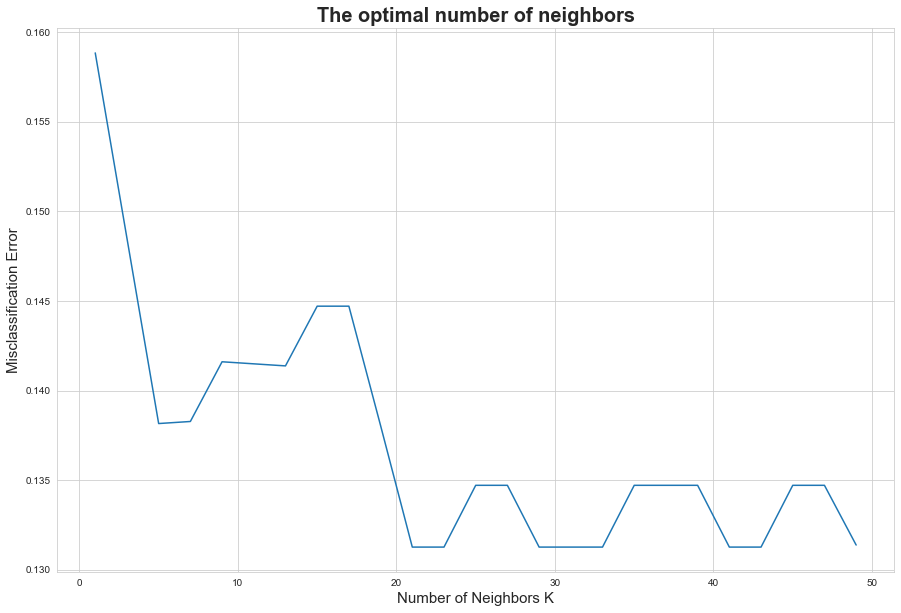

In [83]:
# https://www.kaggle.com/skalskip/iris-data-visualization-and-knn-classification
#  Using cross-validation for parameter turning
from sklearn.model_selection import cross_val_score

k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

import seaborn as sns

MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [84]:
# finding best k

best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 21.


In [85]:
# Using best k
neighbors=best_k
model=KNeighborsClassifier(n_neighbors=neighbors,n_jobs=1)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('Confusion matrix')
matrix=confusion_matrix(y_test,y_pred)
print(matrix)
print('Classification Report')
report=classification_report(y_test,y_pred)
print(report)
print('Accuracy Score')
score=accuracy_score(y_test,y_pred)
print(score)

Confusion matrix
[[46  6]
 [ 5 43]]
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        52
           1       0.88      0.90      0.89        48

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100

Accuracy Score
0.89


/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


# Exercise 4.11

In [88]:
boston_df=pd.read_csv('../../data/Boston.csv',usecols=range(1,15))
boston_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [90]:
crime_median=boston_df['crim'].median()
crime_median

0.25651

In [91]:
boston_df['crime_flag']=boston_df['crim'].apply(lambda x:1 if x>crime_median else 0)

In [98]:
boston_df['crime_flag'].value_counts()

1    253
0    253
Name: crime_flag, dtype: int64

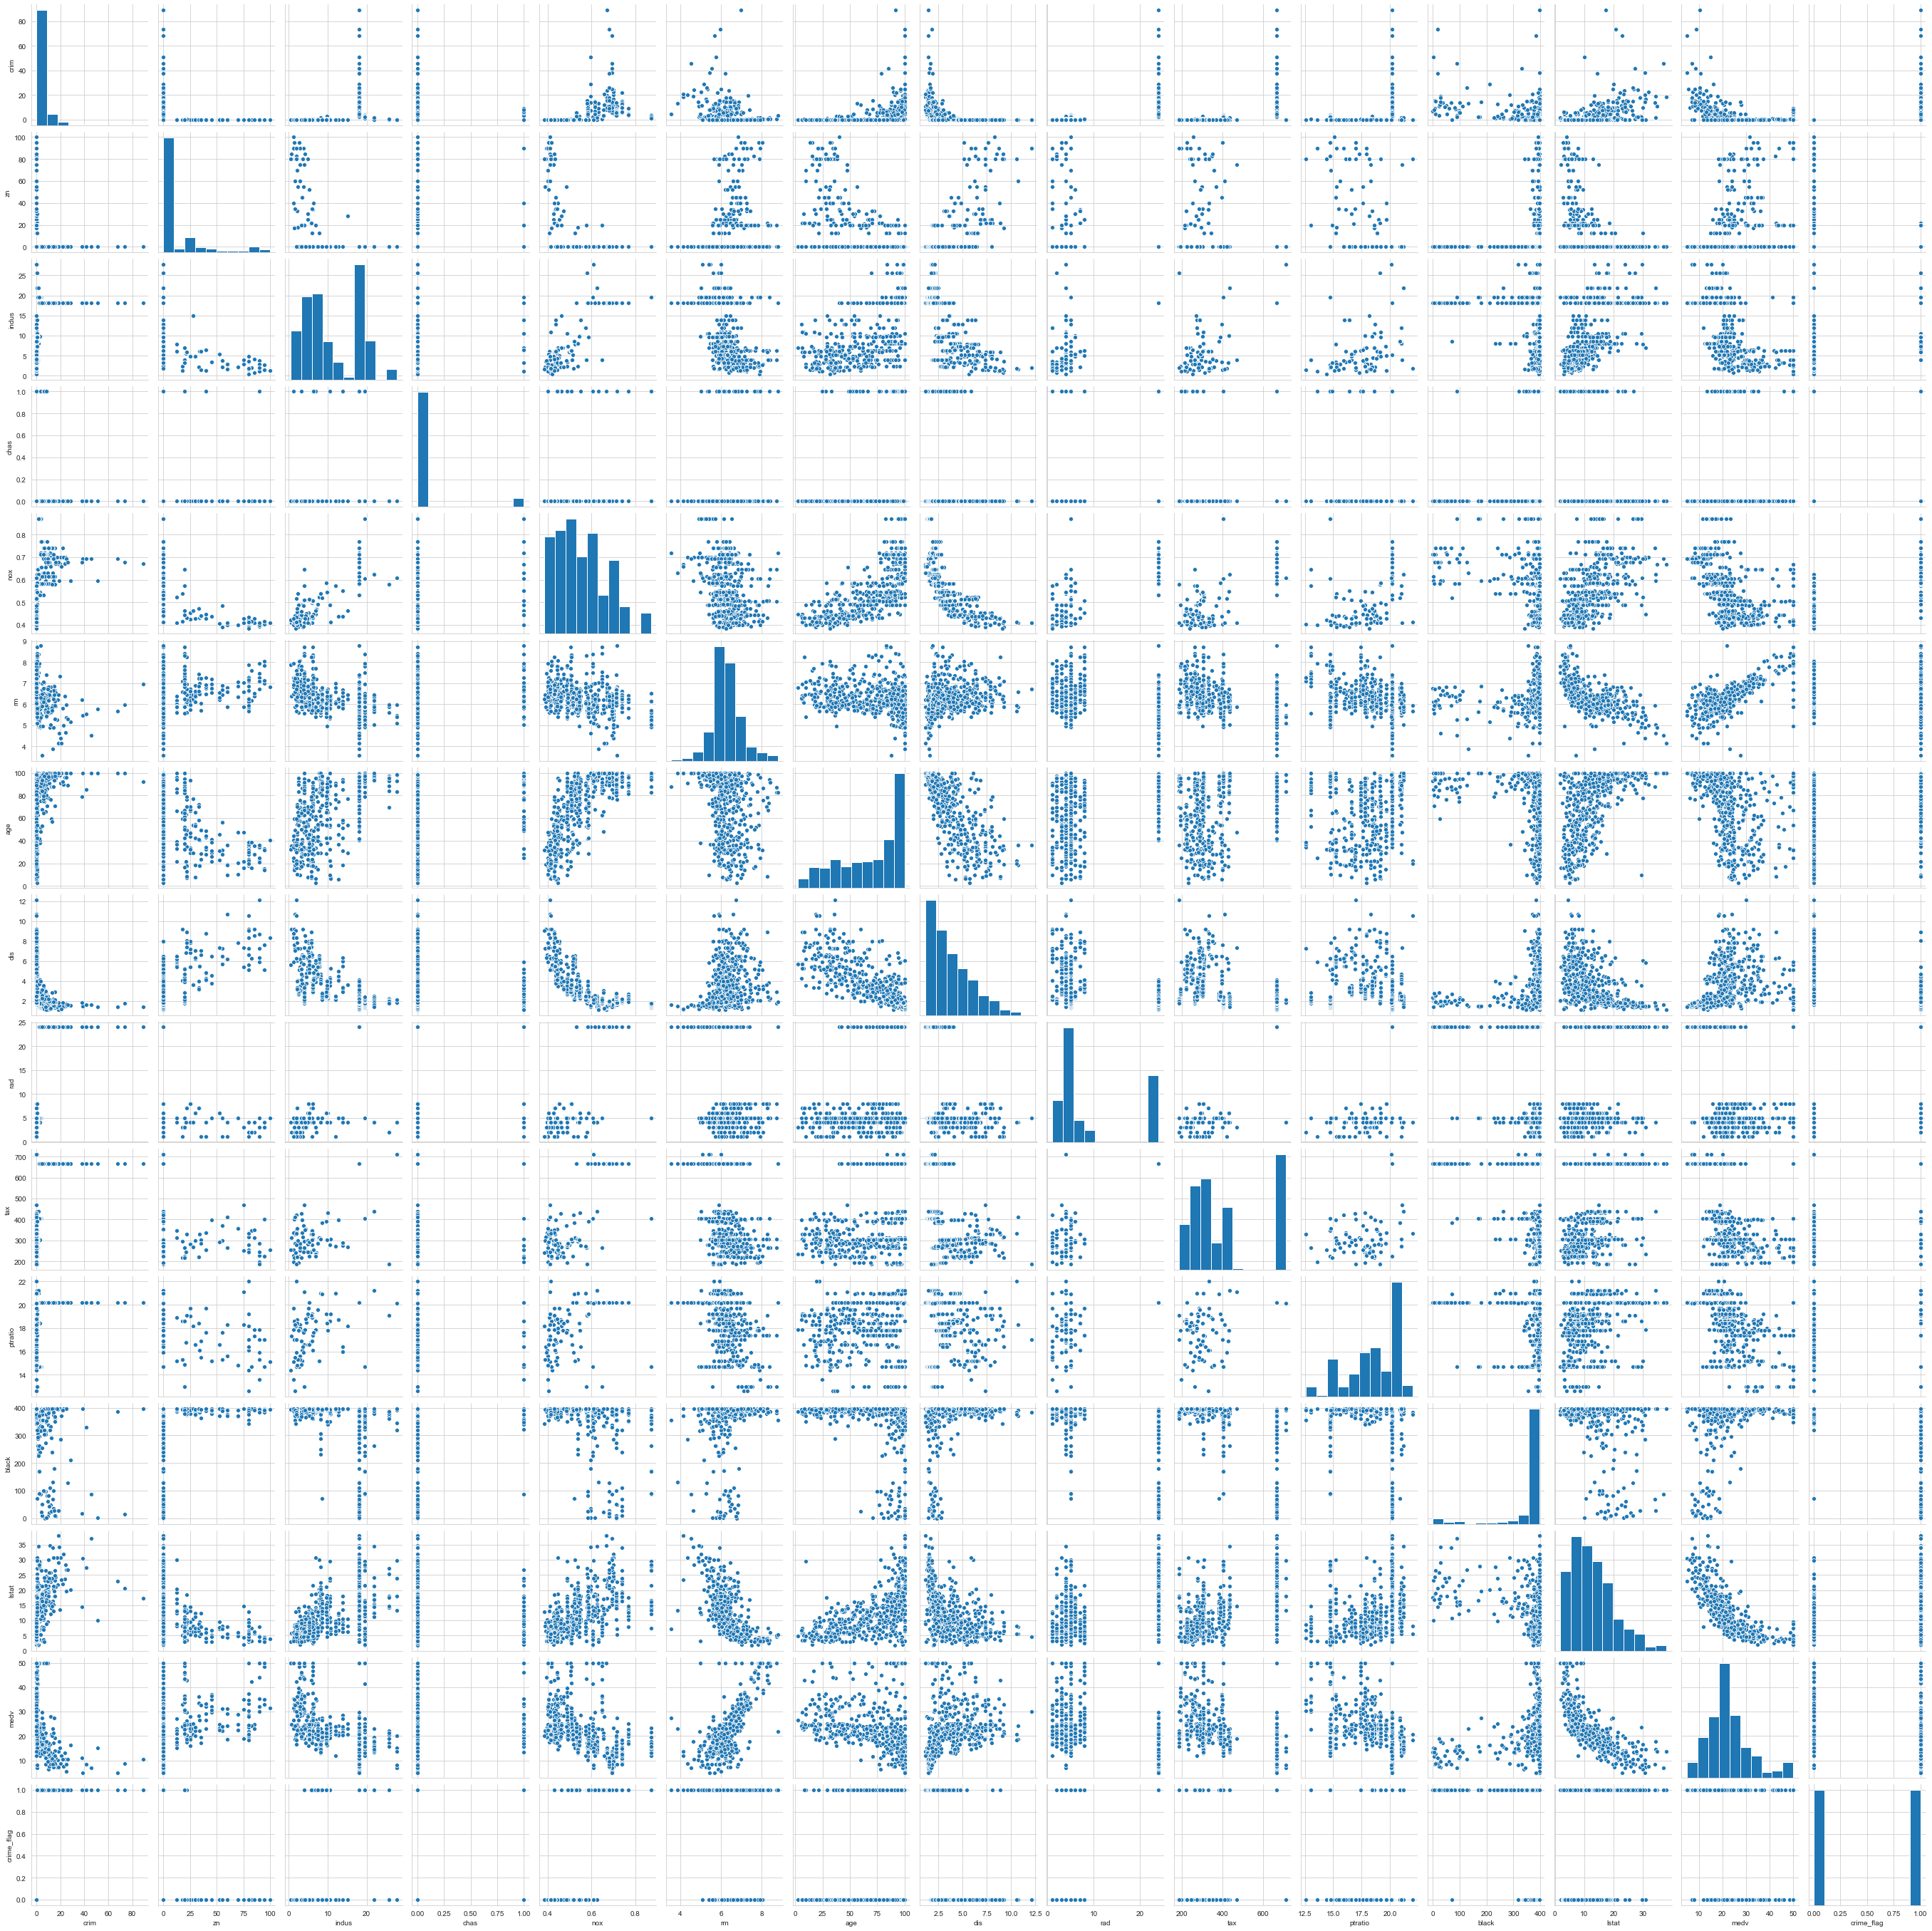

In [99]:
sns.pairplot(boston_df)

/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/seaborn/axisgrid.py:1259: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


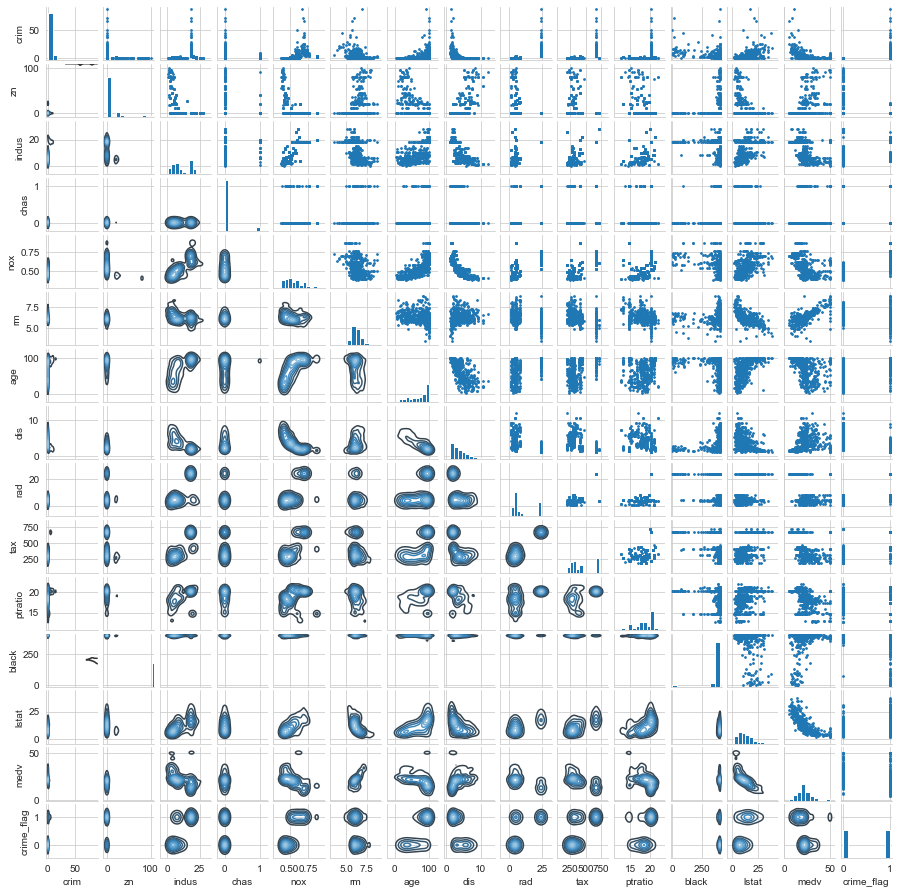

In [100]:
# Box plot for sns
g = sns.PairGrid(boston_df, size=2)
g.map_upper(plt.scatter, s=3)
g.map_diag(plt.hist)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.fig.set_size_inches(12, 12)

In [101]:
boston_df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,crime_flag
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305,0.409395
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445,-0.436151
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725,0.603260
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260,0.070097
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321,0.723235
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360,-0.156372
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955,0.613940
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929,-0.616342
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626,0.619786
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536,0.608741


In [102]:
feature_cols=["indus","nox","age","dis","rad","tax"]
X=boston_df[feature_cols]
y=boston_df['crime_flag'].to_frame()
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(404, 6)
(404, 1)
(102, 6)
(102, 1)


In [103]:
# LDA
lda=LinearDiscriminantAnalysis()
mod = lda.fit(X_train,y_train)
y_pred=mod.predict(X_test)
print('Confusion matrix')
matrix=confusion_matrix(y_test,y_pred)
print(matrix)
print('Classification Report')
report=classification_report(y_test,y_pred)
print(report)
print('Accuracy Score')
score=accuracy_score(y_test,y_pred)
print(score)

Confusion matrix
[[47  5]
 [13 37]]
Classification Report
              precision    recall  f1-score   support

           0       0.78      0.90      0.84        52
           1       0.88      0.74      0.80        50

    accuracy                           0.82       102
   macro avg       0.83      0.82      0.82       102
weighted avg       0.83      0.82      0.82       102

Accuracy Score
0.8235294117647058


/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [104]:
# QDA
qda=QuadraticDiscriminantAnalysis()
mod = qda.fit(X_train,y_train)
y_pred=mod.predict(X_test)
print('Confusion matrix')
matrix=confusion_matrix(y_test,y_pred)
print(matrix)
print('Classification Report')
report=classification_report(y_test,y_pred)
print(report)
print('Accuracy Score')
score=accuracy_score(y_test,y_pred)
print(score)

Confusion matrix
[[51  1]
 [12 38]]
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.98      0.89        52
           1       0.97      0.76      0.85        50

    accuracy                           0.87       102
   macro avg       0.89      0.87      0.87       102
weighted avg       0.89      0.87      0.87       102

Accuracy Score
0.8725490196078431


/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [105]:
# Without Scalers
log_reg=LogisticRegression()
mod = log_reg.fit(X_train,y_train)
y_pred=mod.predict(X_test)
print('Confusion matrix')
matrix=confusion_matrix(y_test,y_pred)
print(matrix)
print('Classification Report')
report=classification_report(y_test,y_pred)
print(report)
print('Accuracy Score')
score=accuracy_score(y_test,y_pred)
print(score)

Confusion matrix
[[43  9]
 [ 9 41]]
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        52
           1       0.82      0.82      0.82        50

    accuracy                           0.82       102
   macro avg       0.82      0.82      0.82       102
weighted avg       0.82      0.82      0.82       102

Accuracy Score
0.8235294117647058


/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/mode

/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/mode

/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/mode

/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/mode

/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/mode

/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/mode

/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/mode

<Figure size 432x288 with 0 Axes>

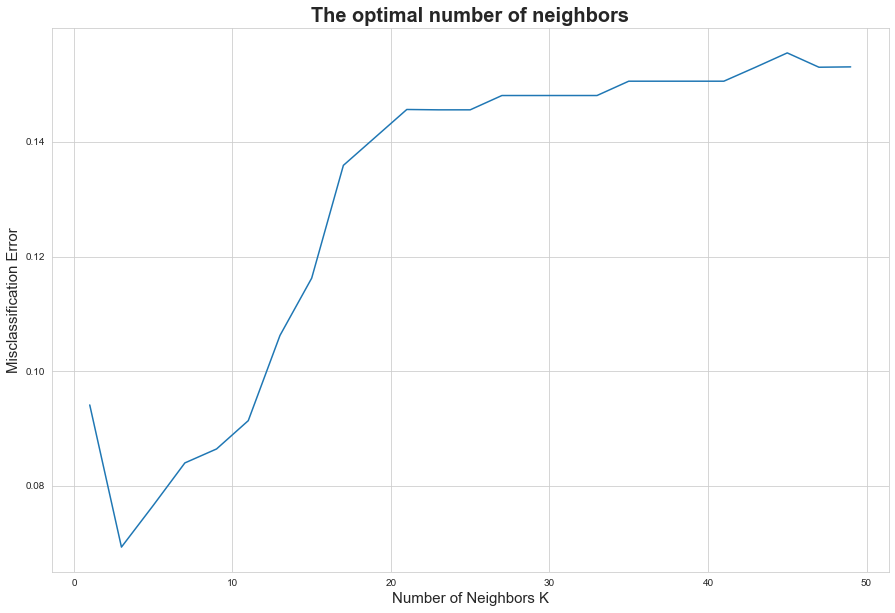

In [106]:
# https://www.kaggle.com/skalskip/iris-data-visualization-and-knn-classification
#  Using cross-validation for parameter turning
from sklearn.model_selection import cross_val_score

k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

import seaborn as sns

MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [107]:
# finding best k

best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 3.


In [108]:
# Using best k
neighbors=best_k
model=KNeighborsClassifier(n_neighbors=neighbors,n_jobs=1)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('Confusion matrix')
matrix=confusion_matrix(y_test,y_pred)
print(matrix)
print('Classification Report')
report=classification_report(y_test,y_pred)
print(report)
print('Accuracy Score')
score=accuracy_score(y_test,y_pred)
print(score)

Confusion matrix
[[47  5]
 [ 7 43]]
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.90      0.89        52
           1       0.90      0.86      0.88        50

    accuracy                           0.88       102
   macro avg       0.88      0.88      0.88       102
weighted avg       0.88      0.88      0.88       102

Accuracy Score
0.8823529411764706


/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
